In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [20]:
data = pd.read_csv('amazon.csv')
data =data.iloc[0:500]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       500 non-null    object 
 1   Open       500 non-null    float64
 2   High       500 non-null    float64
 3   Low        500 non-null    float64
 4   Close      500 non-null    float64
 5   Adj Close  500 non-null    float64
 6   Volume     500 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [22]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,21.301427,22.256219,20.337984,21.297680,21.297680,1.542678e+07
std,25.680666,26.840209,24.317237,25.530820,25.530820,1.497347e+07
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,4.369792,4.536459,4.229167,4.386719,4.386719,4.240500e+06
50%,7.713542,7.859375,7.468750,7.671875,7.671875,1.130820e+07
75%,21.880208,23.140624,21.166668,21.942708,21.942708,2.182200e+07
max,108.500000,110.625000,102.000000,105.062500,105.062500,1.017972e+08


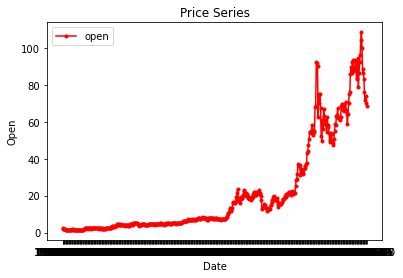

In [23]:
Openplt = plt.plot(data['Date'],data['Open'],'r.-',label='open')
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Price Series')
plt.legend()
Openplt

/Users/lohithsowmiyan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Volume', ylabel='Density'>

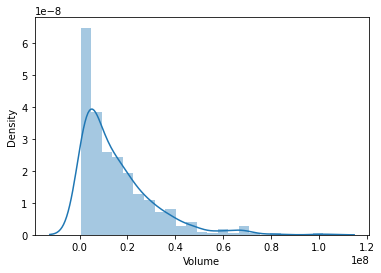

In [24]:
Vl = sns.distplot(data['Volume'])
Vl

In [25]:
#data is normally distributed

from sklearn.model_selection import train_test_split
x=data.drop(columns=['Volume','Date'])
y=data.Volume
x,y

(          Open       High        Low      Close  Adj Close
 0     2.437500   2.500000   1.927083   1.958333   1.958333
 1     1.968750   1.979167   1.708333   1.729167   1.729167
 2     1.760417   1.770833   1.625000   1.708333   1.708333
 3     1.729167   1.750000   1.635417   1.635417   1.635417
 4     1.635417   1.645833   1.375000   1.427083   1.427083
 ..         ...        ...        ...        ...        ...
 495  76.312500  80.250000  70.250000  71.500000  71.500000
 496  71.937500  74.125000  66.937500  73.250000  73.250000
 497  74.000000  75.500000  67.875000  68.687500  68.687500
 498  70.375000  72.000000  65.500000  68.187500  68.187500
 499  68.312500  73.500000  67.000000  73.437500  73.437500
 
 [500 rows x 5 columns],
 0      72156000
 1      14700000
 2       6106800
 3       5467200
 4      18853200
          ...   
 495    21696400
 496    27709800
 497    18284400
 498    16654000
 499    14241200
 Name: Volume, Length: 500, dtype: int64)

In [26]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
x_train,x_test,y_train,y_test

(          Open       High        Low      Close  Adj Close
 275  13.500000  13.750000  11.958333  12.020833  12.020833
 484  94.500000  94.500000  77.500000  79.468750  79.468750
 496  71.937500  74.125000  66.937500  73.250000  73.250000
 433  54.500000  63.000000  54.250000  62.875000  62.875000
 252   7.656250   7.708333   7.458333   7.468750   7.468750
 ..         ...        ...        ...        ...        ...
 47    2.187500   2.333333   2.177083   2.291667   2.291667
 146   4.395833   4.833333   4.395833   4.687500   4.687500
 148   4.583333   4.666667   4.406250   4.583333   4.583333
 147   4.645833   4.802083   4.406250   4.541667   4.541667
 286  21.229168  23.458332  20.916668  23.250000  23.250000
 
 [400 rows x 5 columns],
           Open       High        Low      Close  Adj Close
 91    4.645833   4.812500   4.291667   4.375000   4.375000
 234   7.937500   7.947917   7.593750   7.755208   7.755208
 264   7.479167   7.541667   7.000000   7.041667   7.041667
 66    2.0937

In [27]:
from sklearn.svm import SVR
svm = SVR(C=10,gamma=0.01,kernel='rbf')
svm.fit(x_train,y_train)
predict = svm.predict(x_test)
predict

array([11203462.4551238 , 11204165.99911041, 11204011.09148193,
       11203567.41407535, 11204967.67279403, 11203956.32210559,
       11205443.7951702 , 11204164.11180762, 11203644.8365067 ,
       11205294.9486388 , 11203443.33762163, 11203439.23256973,
       11205451.28048846, 11204694.74688036, 11203433.79698089,
       11203464.57897271, 11203434.26667499, 11204183.41879321,
       11204079.35536044, 11204932.0638215 , 11204959.34583141,
       11203930.92505789, 11204924.68120065, 11205457.99861684,
       11204025.23659138, 11203557.18190768, 11204933.75157447,
       11203531.17209162, 11203539.72109863, 11205358.1277325 ,
       11203473.32305993, 11205445.14874126, 11203470.6448889 ,
       11204930.03689541, 11203533.62388308, 11204922.02628533,
       11203541.77611488, 11203522.43394306, 11203631.80417526,
       11204895.15643089, 11204914.43917418, 11204973.9971631 ,
       11205277.23692019, 11205391.3753616 , 11205409.04694172,
       11203538.66232817, 11203466.54481

In [28]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,predict)
rmse = np.sqrt(mse)
r2= r2_score(y_test,predict)
r2

-0.10861220597266019

In [31]:
from sklearn.linear_model import Ridge

ri = Ridge().fit(x_train,y_train)
ri_p = ri.predict(x_test)
ri_p

array([11957791.9515306 , 11475974.60281271, 11764140.38103377,
       11398891.65054107, 18263317.57328481, 12294531.37078938,
       12105128.85210192, 11837942.58304211, 11282554.87420917,
       21309414.56642357, 11906334.87846864, 11407542.59238268,
       14709925.68989964, 14960501.87743605, 11361766.27693486,
       11988637.04403488, 12712784.98131524, 11588154.47699692,
       11728037.28183297, 45247944.4311692 , 17901846.15227006,
       12582475.77605417, 23294645.60933257, 18012515.85009027,
       11647355.12806997, 11907791.96555404, 24497636.00188852,
       11418419.97315822, 12437657.48635401, 13917431.62236207,
       11908997.22470369, 12785814.51571118, 11439720.44188696,
       16746652.8684253 , 11039395.7455668 , 20411341.2953288 ,
       11463543.92221927, 11690804.24026345, 12050287.07521134,
       27395875.52573336, 32812785.86262881, 27706669.61036187,
       14190169.20221181, 13616604.07288956, 14521075.01784758,
       12073784.46115083, 11602584.81558

In [33]:
import joblib
joblib.dump(ri,'rmodel.pkl')
ri_from_joblib = model = joblib.load("rmodel.pkl")